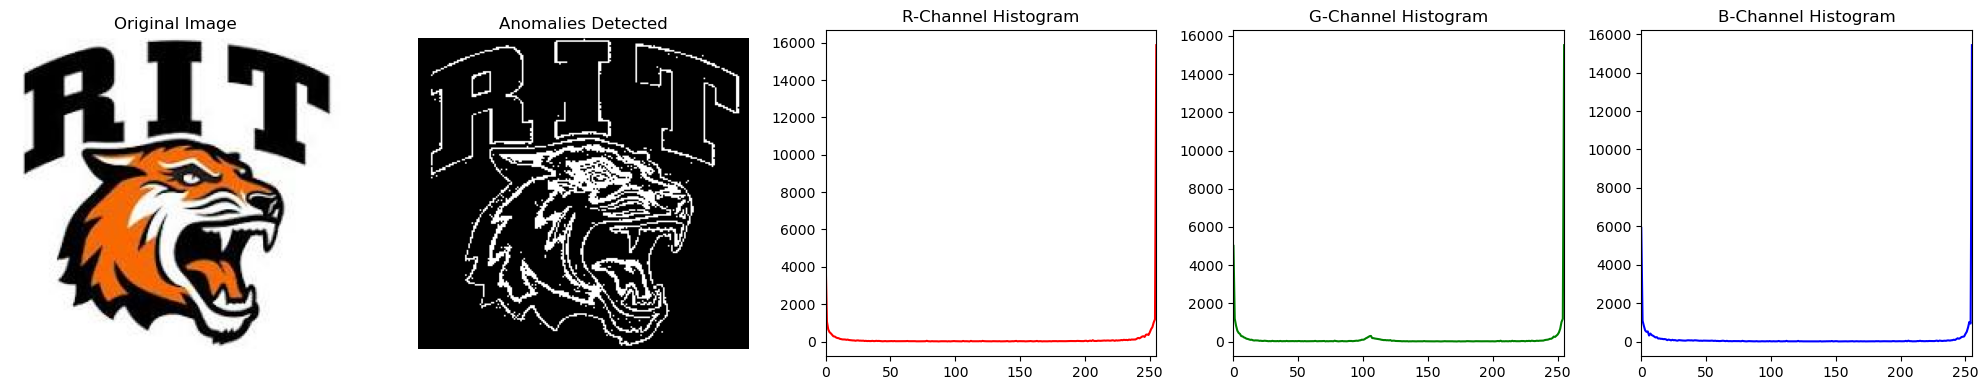

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an example image (convert to RGB format)
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Compute manual histogram for each color channel
def compute_histogram(image, bins=256):
    height, width, channels = image.shape
    histogram = {"R": [0] * bins, "G": [0] * bins, "B": [0] * bins}
    
    for i in range(height):
        for j in range(width):
            r, g, b = image[i, j]
            histogram["R"][r] += 1
            histogram["G"][g] += 1
            histogram["B"][b] += 1
    
    return histogram

# Detect anomalies based on histogram threshold
def detect_anomalies(image, histogram, threshold=0.001):
    height, width, _ = image.shape
    total_pixels = height * width
    
    # Compute threshold count
    min_count = total_pixels * threshold
    
    # Find rare intensity values
    rare_values = {"R": set(), "G": set(), "B": set()}
    for channel in ["R", "G", "B"]:
        for value, count in enumerate(histogram[channel]):
            if count < min_count:  # If a value appears too infrequently
                rare_values[channel].add(value)
    
    # Create an anomaly mask
    anomaly_mask = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            r, g, b = image[i, j]
            if r in rare_values["R"] or g in rare_values["G"] or b in rare_values["B"]:
                anomaly_mask[i, j] = 255  # Mark as anomaly
    
    return anomaly_mask

def display_results(image, histogram, anomaly_mask):
    # Update to 1 row, 5 columns
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns

    # Original image
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    # Anomaly mask (ensure it's grayscale)
    ax[1].imshow(anomaly_mask, cmap='gray')
    ax[1].set_title("Anomalies Detected")
    ax[1].axis("off")

    # Histogram plots
    colors = ['r', 'g', 'b']
    for i, channel in enumerate(["R", "G", "B"]):
        ax[i + 2].plot(range(256), histogram[channel], color=colors[i])  # Plot histograms for R, G, B
        ax[i + 2].set_title(f"{channel}-Channel Histogram")
        ax[i + 2].set_xlim([0, 255])

    plt.tight_layout()
    plt.show()



# Main function
def main(image_path):
    image = load_image(image_path)
    histogram = compute_histogram(image)
    anomaly_mask = detect_anomalies(image, histogram, threshold=0.001)
    display_results(image, histogram, anomaly_mask)

# Example usage
image_path = "RIT.jpg"  # Replace with actual image file
main(image_path)


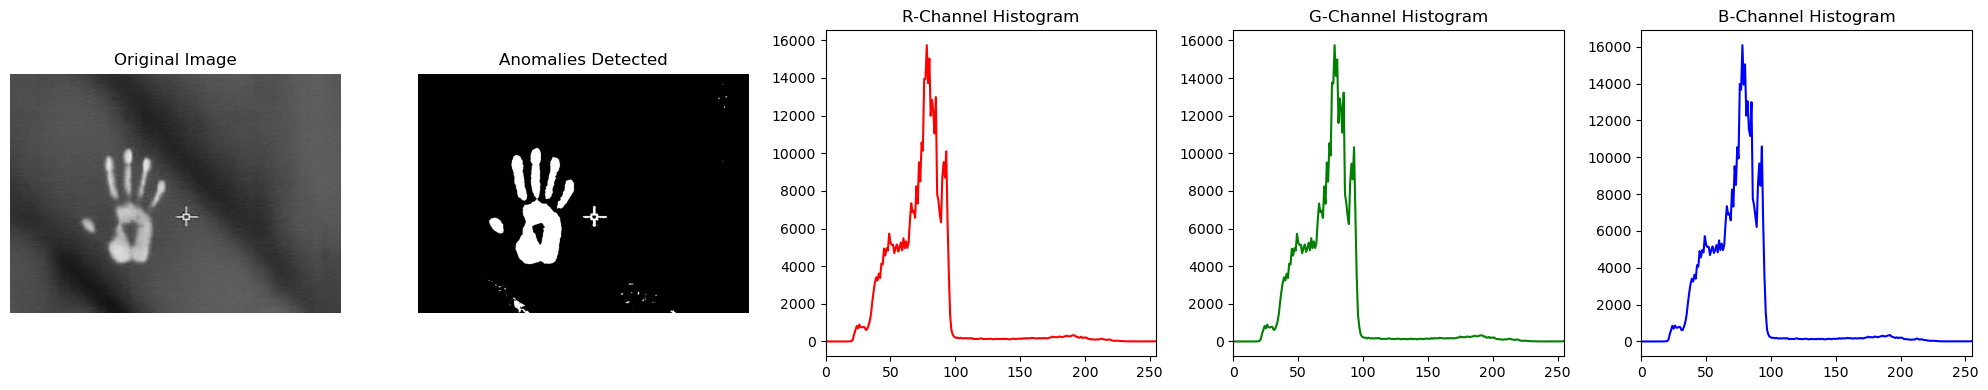

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an example image (convert to RGB format)
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Compute manual histogram for each color channel
def compute_histogram(image, bins=256):
    height, width, channels = image.shape
    histogram = {"R": [0] * bins, "G": [0] * bins, "B": [0] * bins}
    
    for i in range(height):
        for j in range(width):
            r, g, b = image[i, j]
            histogram["R"][r] += 1
            histogram["G"][g] += 1
            histogram["B"][b] += 1
    
    return histogram

# Detect anomalies based on histogram threshold
def detect_anomalies(image, histogram, threshold=0.001):
    height, width, _ = image.shape
    total_pixels = height * width
    
    # Compute threshold count
    min_count = total_pixels * threshold
    
    # Find rare intensity values
    rare_values = {"R": set(), "G": set(), "B": set()}
    for channel in ["R", "G", "B"]:
        for value, count in enumerate(histogram[channel]):
            if count < min_count:  # If a value appears too infrequently
                rare_values[channel].add(value)
    
    # Create an anomaly mask
    anomaly_mask = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            r, g, b = image[i, j]
            if r in rare_values["R"] or g in rare_values["G"] or b in rare_values["B"]:
                anomaly_mask[i, j] = 255  # Mark as anomaly
    
    return anomaly_mask

# Display results
def display_results(image, histogram, anomaly_mask):
    # Update to 1 row, 5 columns
    fig, ax = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns

    # Original image
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    # Anomaly mask (ensure it's grayscale)
    ax[1].imshow(anomaly_mask, cmap='gray')
    ax[1].set_title("Anomalies Detected")
    ax[1].axis("off")

    # Histogram plots
    colors = ['r', 'g', 'b']
    for i, channel in enumerate(["R", "G", "B"]):
        ax[i + 2].plot(range(256), histogram[channel], color=colors[i])  # Plot histograms for R, G, B
        ax[i + 2].set_title(f"{channel}-Channel Histogram")
        ax[i + 2].set_xlim([0, 255])

    plt.tight_layout()
    plt.show()


# Main function
def main(image_path):
    image = load_image(image_path)
    histogram = compute_histogram(image)
    anomaly_mask = detect_anomalies(image, histogram, threshold=0.001)
    display_results(image, histogram, anomaly_mask)

# Example usage
image_path = "Thermal-image.jpg"  # Replace with actual image file
main(image_path)
